# [Learning rate scheduler](https://dacon.io/codeshare/2373)
학습률(Learning Rate)은 모델을 학습하기 위해서 필수적인 요소다. 학습률을 너무 크게 설정한다면, 최솟값에 도달하는 것이 어려우며, 너무 작게 설정하면, local minimum에 빠지거나 학습에 진전이 없을 수 있다. 이번 글에서는 학습률에 Schedular를 설정해서 학습률을 감쇠(Decay)하는 패키지를 다루어볼 것이다.

In [1]:
import torch
import matplotlib.pyplot as plt

## Learning rate scheduler 종류

### LAMBDA LR
Epoch에 따른 가중치로 lr 를 점점 감소 시키는 Scheduler 입니다.
- LambdaLR은 가장 유연한 learning rate scheduler입니다. 어떻게 scheduling을 할 지 lambda 함수 또는 함수를 이용하여 정하기 때문입니다.
- LmabdaLR을 사용할 때 필요한 파라미터는 optimizer, lr_lambda입니다.

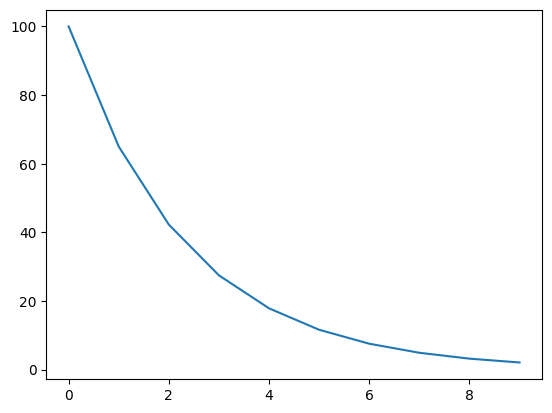

In [2]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
lambda1 = lambda epoch: 0.65 ** epoch
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)


lrs = []

for i in range(10):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(range(10),lrs)

### StepLR
특정 Step에 따라 lr 를 감소시키는 Scheduler 입니다.
- StepLR도 가장 흔히 사용되는 learning rate scheduler 중 하나입니다. 일정한 Step 마다 learning rate에 gamma를 곱해주는 방식입니다.
- StepLR에서 필요한 파라미터는 optimizer, step_size, gamma 입니다.

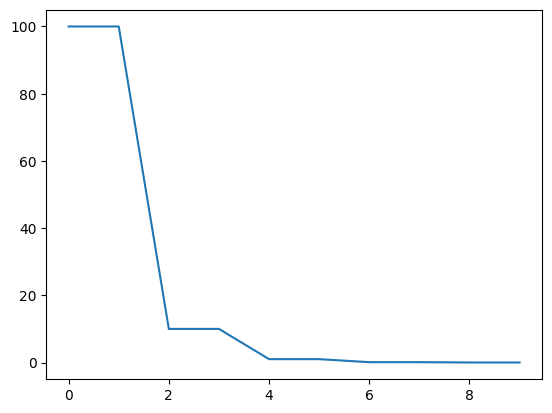

In [3]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)
lrs = []

for i in range(10):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",0.1 if i!=0 and i%2!=0 else 1," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(range(10),lrs)

### MultiStepLR
특정 Step에 따른 감소가 아닌 사용자가 지정한 milestones 에 따라 lr 를 감소시키는 Scheduler 입니다.
- StepLR이 균일한 step size를 사용한다면 이번에 소개할 MultiStepLR은 step size를 여러 기준으로 적용할 수 있는 StepLR의 확장 버전입니다.
- StepLR과 사용방법은 비슷하며 StepLR에서 사용한 step_size 대신, milestones에 리스트 형태로 step 기준을 받습니다. 다음 예제를 살펴보겠습니다.

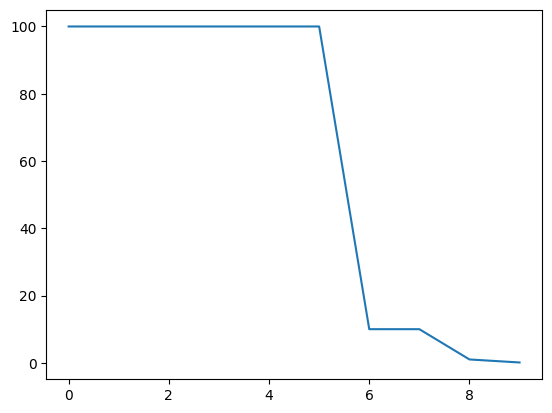

In [4]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[6,8,9], gamma=0.1)
lrs = []

for i in range(10):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",0.1 if i in [6,8,9] else 1," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(range(10),lrs)

### ExponentialLR
- 지수적으로 learning rate가 감소하는 방법도 많이 사용합니다. 이번에 다룰 내용은 지수적으로 learning rate가 감소하는 ExponentialLR입니다.
- 지수적으로 감소하기 때문에 하이퍼 파라미터는 감소율 gamma 하나 입니다.

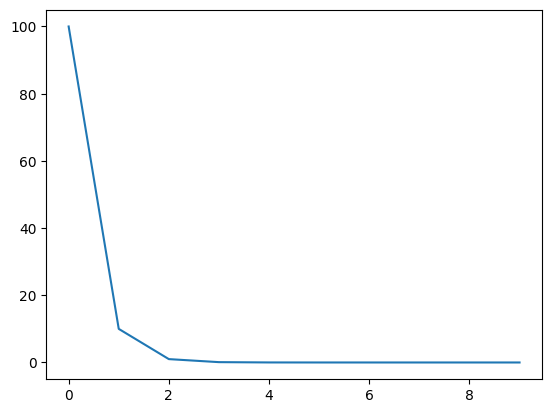

In [5]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.1)
lrs = []


for i in range(10):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",0.1," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)

### CosineAnnealingLR
Cosine 파형을 사용하는 Scheduler 입니다.
- CosineAnnealingLR은 cosine 그래프를 그리면서 learning rate가 진동하는 방식입니다. 최근에는 learning rate가 단순히 감소하기 보다는 진동하면서 최적점을 찾아가는 방식을 많이 사용하고 있습니다. 이러한 방법 중 가장 간단하면서도 많이 사용되는 방법이 CosineAnnealingLR 방식입니다.
- CosineAnnealingLR에 사용되는 파라미터는 T_max 라는 반주기의 단계 크기값과 eta_min 이라는 최소값입니다.

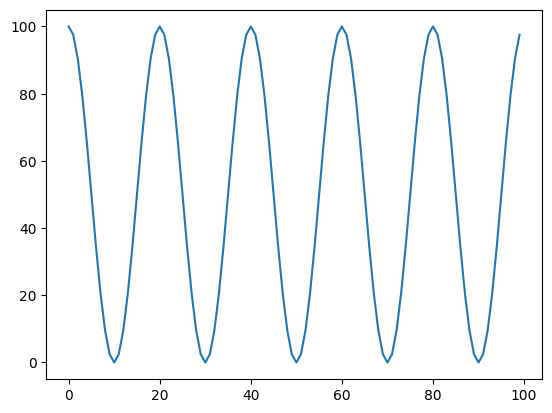

In [6]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=0)
lrs = []


for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)

### CyclicLR
- CyclicLR 방법 또한 많이 사용하는 방법입니다. 앞에서 설명한 CosineAnnealingLR은 단순한 cosine 곡선인 반면에 CyclicLR은 3가지 모드를 지원하면서 변화된 형태로 주기적인 learning rate 증감을 지원합니다.
- 이 때 사용하는 파라미터로 base_lr, max_lr, step_size_up, step_size_down, mode가 있습니다. base_lr은 learning rate의 가장 작은 점인 lower bound가 되고 max_lr은 반대로 learning rate의 가장 큰 점인 upper bound가 됩니다. step_size_up은 base_lr → max_lr로 증가하는 epoch 수가 되고 step_size_down은 반대로 max_lr → base_lr로 감소하는 epoch 수가 됩니다.

#### CyclicLR - triangular

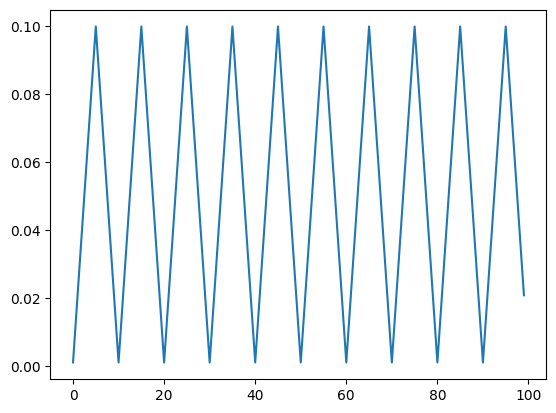

In [7]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1,step_size_up=5,mode="triangular")
lrs = []


for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)

#### CyclicLR - triangular2

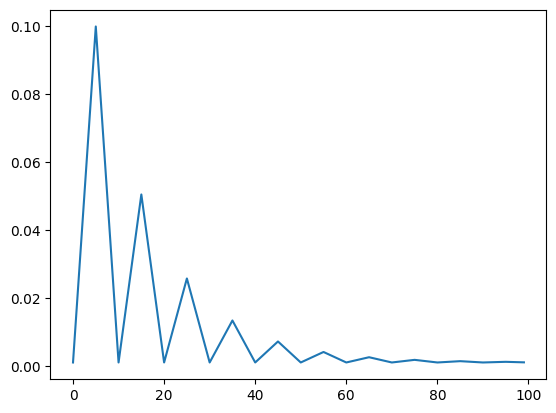

In [8]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1,step_size_up=5,mode="triangular2")
lrs = []


for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)

#### CyclicLR - exp_range

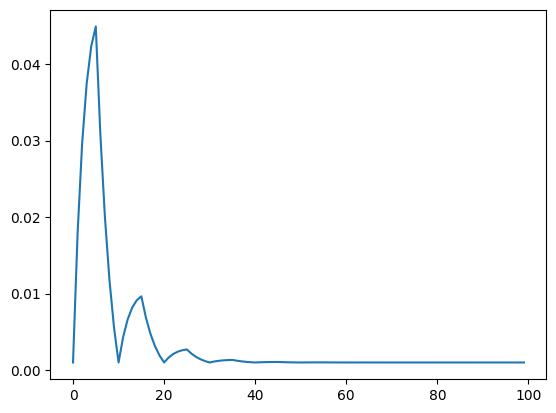

In [9]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1,step_size_up=5,mode="exp_range",gamma=0.85)
lrs = []


for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)

## [예제(StepLR)](https://ok-lab.tistory.com/257)

In [10]:
import torch
import torch.nn as nn

from torch.optim.lr_scheduler import StepLR
import torch.optim as optim

from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as dsets

### Dataset & DataLoader

In [11]:
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 191042900.61it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 91148001.37it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 63615462.56it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 16408724.18it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [12]:
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset)/batch_size)
num_epochs = int(num_epochs)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

### Model

In [13]:
class FFNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FFNN, self).__init__()

        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim

        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()

        self.fc2 = nn.Linear(hidden_dim, output_dim)

        self._init_weight()

    def forward(self,images):
        out = self.fc1(images)
        out = self.relu(out)
        out = self.fc2(out)
        return out

    def _init_weight(self):
        for module in self.modules():
            if isinstance(module, nn.Linear):
                nn.init.kaiming_normal_(module.weight)
                nn.init.zeros_(module.bias)

### Training

In [14]:
input_dim = 28 * 28
hidden_dim = 100
output_dim = 10
learning_rate = 1e-1

model = FFNN(input_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, nesterov=True)

# step_size를 지정하면 step 마다 learning rate를 gamma만큼 감소시킵니다.
# gamma = decaying factor
scheduler = StepLR(optimizer, step_size=1, gamma=0.1)

Epoch: 0, LR: [0.1]
Iteration: 500, Loss: 0.1172, Accuracy: 96.17%
Epoch: 1, LR: [0.010000000000000002]
Iteration: 1000, Loss: 0.0817, Accuracy: 97.74%
Epoch: 2, LR: [0.0010000000000000002]
Iteration: 1500, Loss: 0.0279, Accuracy: 97.93%
Epoch: 3, LR: [0.00010000000000000003]
Iteration: 2000, Loss: 0.0576, Accuracy: 97.93%
Epoch: 4, LR: [1.0000000000000004e-05]
Iteration: 2500, Loss: 0.0767, Accuracy: 97.92%
Iteration: 3000, Loss: 0.0563, Accuracy: 97.92%


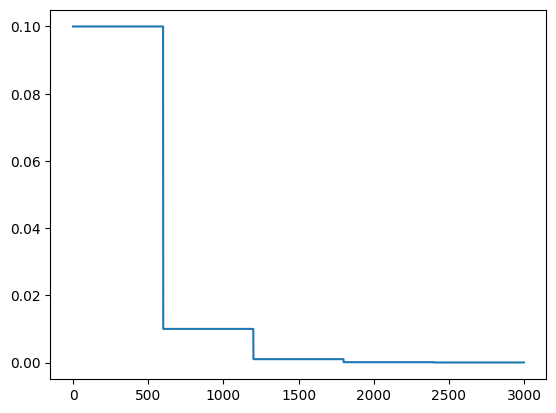

In [15]:
iter = 0
lrs = []
for epoch in range(num_epochs):

    print(f'Epoch: {epoch}, LR: {scheduler.get_last_lr()}')

    model.train()
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28)

        optimizer.zero_grad()
        pred_y = model(images) # model.train()을 사용하지 않으면, images = imgaes.require_grad_()를 설정해주어야 합니다.
        loss = criterion(pred_y, labels)
        loss.backward()
        optimizer.step()
        lrs.append(optimizer.param_groups[0]["lr"])

        iter += 1

        if iter % 500 == 0 :
            correct = 0
            total = 0
            model.eval()
            for images, labels in test_loader:
                images = images.view(-1, 28*28)

                pred_y = model(images)
                pred_y = torch.argmax(pred_y.data, 1)

                total += labels.size(0)

                correct += (pred_y == labels).sum()

            accuracy = 100 * correct / total

            print(f'Iteration: {iter}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%')
    scheduler.step()

plt.plot(lrs)

# [Ray Tune을 이용한 하이퍼파라미터 튜닝](https://tutorials.pytorch.kr/beginner/hyperparameter_tuning_tutorial.html)
- 하이퍼파라미터 튜닝은 보통의 모델과 매우 정확한 모델간의 차이를 만들어 낼 수 있습니다. 종종 다른 학습률(Learnig rate)을 선택하거나 layer size를 변경하는 것과 같은 간단한 작업만으로도 모델 성능에 큰 영향을 미치기도 합니다.
- 다행히, 최적의 매개변수 조합을 찾는데 도움이 되는 도구가 있습니다. Ray Tune 은 분산 하이퍼파라미터 튜닝을 위한 업계 표준 도구입니다. Ray Tune은 최신 하이퍼파라미터 검색 알고리즘을 포함하고 TensorBoard 및 기타 분석 라이브러리와 통합되며 기본적으로 Ray 의 분산 기계 학습 엔진 을 통해 학습을 지원합니다.


- https://colab.research.google.com/drive/1OFQ_yWmjNZScot-qxvkP-cYGI9sHHFtt?usp=sharing#scrollTo=rR7VNlqilKev

In [16]:
%%bash

pip install ray[tune] -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 10.9 MB/s eta 0:00:00


In [17]:
from functools import partial
import numpy as np
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import random_split
import torchvision
import torchvision.transforms as transforms
from ray import tune
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler

## Data Loaders

In [18]:
def load_data(data_dir="./data"):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    trainset = torchvision.datasets.CIFAR10(
        root=data_dir, train=True, download=True, transform=transform)

    testset = torchvision.datasets.CIFAR10(
        root=data_dir, train=False, download=True, transform=transform)

    return trainset, testset

## Model

In [19]:
class Net(nn.Module):
    def __init__(self, l1=120, l2=84):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, l1)
        self.fc2 = nn.Linear(l1, l2)
        self.fc3 = nn.Linear(l2, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## Training

In [20]:
def train_cifar(config, checkpoint_dir=None, data_dir=None):
    net = Net(config["l1"], config["l2"])

    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if torch.cuda.device_count() > 1:
            net = nn.DataParallel(net)
    net.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=config["lr"], momentum=0.9)

    if checkpoint_dir:
        model_state, optimizer_state = torch.load(
            os.path.join(checkpoint_dir, "checkpoint"))
        net.load_state_dict(model_state)
        optimizer.load_state_dict(optimizer_state)

    trainset, testset = load_data(data_dir)

    test_abs = int(len(trainset) * 0.8)
    train_subset, val_subset = random_split(
        trainset, [test_abs, len(trainset) - test_abs])

    trainloader = torch.utils.data.DataLoader(
        train_subset,
        batch_size=int(config["batch_size"]),
        shuffle=True,
        num_workers=8)
    valloader = torch.utils.data.DataLoader(
        val_subset,
        batch_size=int(config["batch_size"]),
        shuffle=True,
        num_workers=8)

    for epoch in range(10):  # loop over the dataset multiple times
        running_loss = 0.0
        epoch_steps = 0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            epoch_steps += 1
            if i % 2000 == 1999:  # print every 2000 mini-batches
                print("[%d, %5d] loss: %.3f" % (epoch + 1, i + 1,
                                                running_loss / epoch_steps))
                running_loss = 0.0

        # Validation loss
        val_loss = 0.0
        val_steps = 0
        total = 0
        correct = 0
        for i, data in enumerate(valloader, 0):
            with torch.no_grad():
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = net(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

                loss = criterion(outputs, labels)
                val_loss += loss.cpu().numpy()
                val_steps += 1

        with tune.checkpoint_dir(epoch) as checkpoint_dir:
            path = os.path.join(checkpoint_dir, "checkpoint")
            torch.save((net.state_dict(), optimizer.state_dict()), path)

        tune.report(loss=(val_loss / val_steps), accuracy=correct / total)
    print("Finished Training")

In [21]:
def test_accuracy(net, device="cpu"):
    trainset, testset = load_data()

    testloader = torch.utils.data.DataLoader(
        testset, batch_size=4, shuffle=False, num_workers=2)

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total

In [22]:
def trial_str_creator(trial):
    return "{}_{}_123".format(trial.trainable_name, trial.trial_id)


def get_best_config(result, metric="loss", mode="min", device=None):
    best_trial = result.get_best_trial(metric, mode, "last")
    print("Best trial config: {}".format(best_trial.config))
    print("Best trial final validation {}: {}".format(metric, best_trial.last_result[metric]))

    # best_trained_model = get_net(best_trial.config, device=device)

    best_checkpoint_dir = best_trial.checkpoint.value
    model_state, optimizer_state = torch.load(os.path.join(best_checkpoint_dir, "checkpoint"))
    # best_trained_model.load_state_dict(model_state)

    return best_trial.config, best_checkpoint_dir

In [25]:
def main(num_samples=10, max_num_epochs=10, gpus_per_trial=2):
    data_dir = os.path.abspath("./data")
    load_data(data_dir)
    config = {
        "l1": tune.sample_from(lambda _: 2 ** np.random.randint(2, 9)),
        "l2": tune.sample_from(lambda _: 2 ** np.random.randint(2, 9)),
        "lr": tune.loguniform(1e-4, 1e-1),
        "batch_size": tune.choice([2, 4, 8, 16])
    }
    scheduler = ASHAScheduler(
        metric="loss",
        mode="min",
        max_t=max_num_epochs,
        grace_period=1,
        reduction_factor=2)

    # reporter = CLIReporter(
    #     # ``parameter_columns=["l1", "l2", "lr", "batch_size"]``,
    #     metric_columns=["loss", "accuracy", "training_iteration"])

    reporter = tune.JupyterNotebookReporter(
        # ``parameter_columns=["l1", "l2", "lr", "batch_size"]``,
        metric_columns=["loss", "accuracy", "training_iteration"])

    result = tune.run(
        partial(train_cifar, data_dir=data_dir),
        resources_per_trial={"cpu": 2, "gpu": gpus_per_trial},
        config=config,
        num_samples=num_samples,
        scheduler=scheduler,
        progress_reporter=reporter,
        trial_dirname_creator=trial_str_creator)

    best_trial = result.get_best_trial("loss", "min", "last")
    print("Best trial config: {}".format(best_trial.config))
    print("Best trial final validation loss: {}".format(
        best_trial.last_result["loss"]))
    print("Best trial final validation accuracy: {}".format(
        best_trial.last_result["accuracy"]))

    best_trained_model = Net(best_trial.config["l1"], best_trial.config["l2"])
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if gpus_per_trial > 1:
            best_trained_model = nn.DataParallel(best_trained_model)
    best_trained_model.to(device)

    best_checkpoint_dir = best_trial.checkpoint.value
    model_state, optimizer_state = torch.load(os.path.join(
        best_checkpoint_dir, "checkpoint"))
    best_trained_model.load_state_dict(model_state)

    test_acc = test_accuracy(best_trained_model, device)
    print("Best trial test set accuracy: {}".format(test_acc))

    return result


# if __name__ == "__main__":
#     # You can change the number of GPUs per trial here:
#     main(num_samples=10, max_num_epochs=10, gpus_per_trial=0)

In [ ]:
result = main(num_samples=10, max_num_epochs=10, gpus_per_trial=0)

2023-08-16 10:59:44,011	INFO worker.py:1621 -- Started a local Ray instance.
2023-08-16 10:59:45,679	INFO tune.py:226 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `tune.run(...)`.
2023-08-16 10:59:45,704	INFO tune.py:666 -- [output] This will use the new output engine with verbosity 2. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949
/usr/local/lib/python3.10/dist-packages/ray/tune/trainable/function_trainable.py:624: DeprecationWarning: `checkpoint_dir` in `func(config, checkpoint_dir)` is being deprecated. To save and load checkpoint in trainable functions, please use the `ray.air.session` API:

from ray.air import session

def train(config):
    # ...
    session.report({"metric": metric}, checkpoint=checkpoint)

For more information please see https://docs.ray.io/en/latest/tun

+--------------------------------------------------------------------+
| Configuration for experiment     train_cifar_2023-08-16_10-59-45   |
+--------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator             |
| Scheduler                        AsyncHyperBandScheduler           |
| Number of trials                 10                                |
+--------------------------------------------------------------------+

View detailed results here: /root/ray_results/train_cifar_2023-08-16_10-59-45
To visualize your results with TensorBoard, run: `tensorboard --logdir /root/ray_results/train_cifar_2023-08-16_10-59-45`

Trial status: 10 PENDING
Current time: 2023-08-16 10:59:46. Total running time: 0s
Logical resource usage: 0/4 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:V100)
+-----------------------------------------------------------------+
| Trial name                status              lr     batch_size |
+------

(func pid=1771) /usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
(func pid=1771)   warnings.warn(_create_warning_msg(


(func pid=1772) [1,  2000] loss: 2.302
(func pid=1771) Files already downloaded and verified [repeated 3x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
(func pid=1772) [1,  4000] loss: 1.126 [repeated 2x across cluster]
Trial status: 2 RUNNING | 8 PENDING
Current time: 2023-08-16 11:00:16. Total running time: 30s
Logical resource usage: 4.0/4 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:V100)
+-----------------------------------------------------------------+
| Trial name                status              lr     batch_size |
+-----------------------------------------------------------------+
| train_cifar_02b94_00000   RUNNING    0.0698852                2 |
| train_cifar_02b94_00001   RUNNING    0.000261654              4 |
| train_cifar_02b94_00002   PENDING    0.000128603             16 |
| train_cifar_02b94_00003   PENDING

In [ ]:
# Get the best trained config
best_config, best_checkpoint_dir = get_best_config(result)

In [ ]:
log_dir = os.path.dirname(os.path.dirname(os.path.dirname(best_checkpoint_dir )))

%load_ext tensorboard
%tensorboard --logdir {log_dir}